In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/IMDB Dataset.csv')
df.head(5)


review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:

print('length of data is', len(df))

length of data is 50000


In [ ]:
df. shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.dtypes


review       object
sentiment    object
dtype: object

In [ ]:
np.sum(df.isnull().any(axis=1))

0

In [ ]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   2
Count of rows in the data is:   50000


In [ ]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

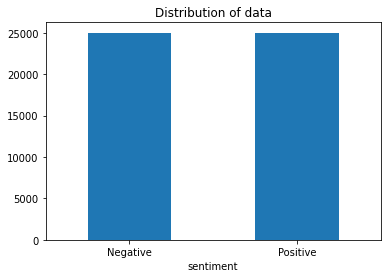

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['review']), list(df['sentiment'])

In [ ]:
data=df[['review','sentiment']]

In [ ]:
df['sentiment'] = df['sentiment'].replace(['positive'],'1')
df['sentiment'] = df['sentiment'].replace(['negative'],'0')

In [ ]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
data.head(20)

review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.<br /><br />Shakes...  negative
14  This a fantastic movie of three prisoners who ...  positive
15  Kind of drawn in by the erotic scenes, only to...  negative
16  Some films just simply should not be remade. T...  positive
17  This movie made it into one of my top 10 most ...  negative
18  I remember this film,it was the first film i h...  positive
19  An awful film! It must have been up against so...  negative

In [ ]:
data['review']=data['review'].str.lower()
data['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [ ]:
data.head(20)

review sentiment
0   one of the other reviewers has mentioned that ...  positive
1   a wonderful little production. <br /><br />the...  positive
2   i thought this was a wonderful way to spend ti...  positive
3   basically there's a family where a little boy ...  negative
4   petter mattei's "love in the time of money" is...  positive
5   probably my all-time favorite movie, a story o...  positive
6   i sure would like to see a resurrection of a u...  positive
7   this show was an amazing, fresh & innovative i...  negative
8   encouraged by the positive comments about this...  negative
9   if you like original gut wrenching laughter yo...  positive
10  phil the alien is one of those quirky films wh...  negative
11  i saw this movie when i was about 12 when it c...  negative
12  so im not a big fan of boll's work but then ag...  negative
13  the cast played shakespeare.<br /><br />shakes...  negative
14  this a fantastic movie of three prisoners who ...  positive
15  kind of drawn in by the erotic scenes, only to...  negative
16  some films just simply should not be remade. t...  positive
17  this movie made it into one of my top 10 most ...  negative
18  i remember this film,it was the first film i h...  positive
19  an awful film! it must have been up against so...  negative

In [ ]:
stopwords = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwords)
def cleaning_stopwords(review):
    return " ".join([word for word in str(review).split() if word not in STOPWORDS])
data['review'] = data['review'].apply(lambda review: cleaning_stopwords(review))
data['review'].head(20)

0     one reviewers mentioned watching 1 oz episode ...
1     wonderful little production. <br /><br />the f...
2     thought wonderful way spend time hot summer we...
3     basically there's family little boy (jake) thi...
4     petter mattei's "love time money" visually stu...
5     probably all-time favorite movie, story selfle...
6     sure would like see resurrection dated seahunt...
7     show amazing, fresh & innovative idea 70's fir...
8     encouraged positive comments film looking forw...
9     like original gut wrenching laughter like movi...
10    phil alien one quirky films humour based aroun...
11    saw movie 12 came out. recall scariest scene b...
12    im not big fan boll's work but not many are. e...
13    cast played shakespeare.<br /><br />shakespear...
14    fantastic movie three prisoners become famous....
15    kind drawn erotic scenes, realize one amateuri...
16    films simply not remade. one them. not bad fil...
17    movie made one top 10 awful movies. horrib

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(review):
    translator = str.maketrans('', '', punctuations_list)
    return review.translate(translator)
data['review']= data['review'].apply(lambda x: cleaning_punctuations(x))
data['review'].head(20)

0     one reviewers mentioned watching 1 oz episode ...
1     wonderful little production br br the filming ...
2     thought wonderful way spend time hot summer we...
3     basically theres family little boy jake thinks...
4     petter matteis love time money visually stunni...
5     probably alltime favorite movie story selfless...
6     sure would like see resurrection dated seahunt...
7     show amazing fresh  innovative idea 70s first ...
8     encouraged positive comments film looking forw...
9     like original gut wrenching laughter like movi...
10    phil alien one quirky films humour based aroun...
11    saw movie 12 came out recall scariest scene bi...
12    im not big fan bolls work but not many are enj...
13    cast played shakespearebr br shakespeare lostb...
14    fantastic movie three prisoners become famous ...
15    kind drawn erotic scenes realize one amateuris...
16    films simply not remade one them not bad film ...
17    movie made one top 10 awful movies horribl

In [ ]:
def cleaning_repeating_char(review):
    return re.sub(r'(.)1+', r'1', review)
data['review'] = data['review'].apply(lambda x: cleaning_repeating_char(x))
data['review'].head(20)

0     one reviewers mentioned watching1 oz episode y...
1     wonderful little production br br the filming ...
2     thought wonderful way spend time hot summer we...
3     basically theres family little boy jake thinks...
4     petter matteis love time money visually stunni...
5     probably alltime favorite movie story selfless...
6     sure would like see resurrection dated seahunt...
7     show amazing fresh  innovative idea 70s first ...
8     encouraged positive comments film looking forw...
9     like original gut wrenching laughter like movi...
10    phil alien one quirky films humour based aroun...
11    saw movie12 came out recall scariest scene big...
12    im not big fan bolls work but not many are enj...
13    cast played shakespearebr br shakespeare lostb...
14    fantastic movie three prisoners become famous ...
15    kind drawn erotic scenes realize one amateuris...
16    films simply not remade one them not bad film ...
17    movie made one top10 awful movies horrible

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['review'] = data['review'].apply(lambda x: cleaning_URLs(x))
data['review'].head(20)

0     one reviewers mentioned watching1 oz episode y...
1     wonderful little production br br the filming ...
2     thought wonderful way spend time hot summer we...
3     basically theres family little boy jake thinks...
4     petter matteis love time money visually stunni...
5     probably alltime favorite movie story selfless...
6     sure would like see resurrection dated seahunt...
7     show amazing fresh  innovative idea 70s first ...
8     encouraged positive comments film looking forw...
9     like original gut wrenching laughter like movi...
10    phil alien one quirky films humour based aroun...
11    saw movie12 came out recall scariest scene big...
12    im not big fan bolls work but not many are enj...
13    cast played shakespearebr br shakespeare lostb...
14    fantastic movie three prisoners become famous ...
15    kind drawn erotic scenes realize one amateuris...
16    films simply not remade one them not bad film ...
17    movie made one top10 awful movies horrible

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data['review'] = data['review'].apply(lambda x: cleaning_numbers(x))
data['review'].head(20)

0     one reviewers mentioned watching oz episode yo...
1     wonderful little production br br the filming ...
2     thought wonderful way spend time hot summer we...
3     basically theres family little boy jake thinks...
4     petter matteis love time money visually stunni...
5     probably alltime favorite movie story selfless...
6     sure would like see resurrection dated seahunt...
7     show amazing fresh  innovative idea s first ai...
8     encouraged positive comments film looking forw...
9     like original gut wrenching laughter like movi...
10    phil alien one quirky films humour based aroun...
11    saw movie came out recall scariest scene big b...
12    im not big fan bolls work but not many are enj...
13    cast played shakespearebr br shakespeare lostb...
14    fantastic movie three prisoners become famous ...
15    kind drawn erotic scenes realize one amateuris...
16    films simply not remade one them not bad film ...
17    movie made one top awful movies horrible b

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
for sentence in data['review']:
    review = sentence.split()
    print (review) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['one', 'reviewers', 'mentioned', 'watching', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'mebr', 'br', 'the', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'me', 'not', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'no', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordbr', 'br', 'it', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'not', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['todays', 'standards', 'di', 'might', 'seem', 'little', 'hokey', 'lee', 'emerys', 'version', 'accurate', 'graduated', 'boot', 'camp', 'parris', 'island', 'sc', 'jim', 'moore', 'close', 'real', 'thing', 'could', 'put', 'screen', 'cant', 'comment', 'plot', 'but', 'thought', 'ending', 'unrealistic', 'mcrd', 'pvt', 'owens', 'like', 'many', 'found', 'lot', 'difficult', 'situation', 'bargained', 'for', 'like', 'many', 'joined', 'marine', 'corps', 'wrong', 'reasons', 'drill', 'intructors', 'like', 'gysgt', 'hartman', 'tsgt', 'jim', 'moore', 'lot', 'more', 'di', 'korean', 'era', 'full', 'metal', 'jacket', 'viet', 'nam', 'era', 'todays', 'movies', 'allow', 'sort', 'thing', 'screen', 'di', 'collection', 'recently', 'found', 'dvd']
['wow', 'begin', 'suffering', 'wretched', 'rental', 'thanks', 'lot', 'family', 'video', 'make', 'comments', 'not', 'bother', 'write', 'names', 'actors', 'film', 'but', 'hopefully', 'know', 'talking', 'aboutbr', 'br', 'a', 'monster', 'truck', 'terrorizes', 'countryside

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['oh', 'god', 'oh', 'god', 'cant', 'get', 'over', 'movie', 'godawful', 'horrible', 'terrible', 'dont', 'even', 'waste', 'money', 'buy', 'cent', 'bin', 'no', 'avoid', 'costs', 'im', 'warning', 'youbr', 'br', 'it', 'worst', 'movie', 'ive', 'ever', 'seen', 'life', 'lifebr', 'br', 'first', 'all', 'ggirl', 'kidding', 'me', 'get', 'real', 'sounds', 'like', 'kind', 'new', 'barbie', 'doll', 'super', 'women', 'kidding', 'me', 'fake', 'fake', 'fake', 'fake', 'people', 'town', 'didnt', 'even', 'seem', 'care', 'flying', 'blonde', 'zooming', 'way', 'around', 'town', 'saving', 'fire', 'ohh', 'bigbr', 'br', 'jesus', 'movie', 'seem', 'offensive', 'guess', 'need', 'super', 'hero', 'couple', 'double', 'ds', 'blonde', 'flowing', 'hair', 'no', 'glasses', 'leather', 'skin', 'tight', 'suitbr', 'br', 'if', 'trying', 'romantic', 'than', 'god', 'dont', 'know', 'horrid', 'love', 'means', 'taking', 'one', 'art', 'show', 'sex', 'bed', 'air', 'totally', 'lovebr', 'br', 'it', 'pathetic', 'everything', 'went', 'fas

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['reworking', 'anthony', 'shaffers', 'classic', 'play', 'not', 'last', 'long', 'cinemas', 'recently', 'suffered', 'cable', 'still', 'congratulate', 'not', 'wasting', 'money', 'ticket', 'director', 'kenneth', 'branagh', 'writer', 'harold', 'pinter', 'starproducer', 'jude', 'law', 'deluded', 'prestige', 'alone', 'could', 'sustain', 'travesty', 'interminable', 'minutes', 'without', 'fun', 'class', 'longer', 'originalbr', 'br', 'michael', 'caine', 'enhanced', 'reputation', 'playing', 'second', 'lead', 'marvelous', 'film', 'seems', 'intent', 'destroying', 'attempting', 'lead', 'played', 'version', 'laurence', 'olivier', 'both', 'nominated', 'best', 'actor', 'oscars', 'but', 'lost', 'marlon', 'brando', 'godfather', 'looking', 'puffy', 'washedout', 'caine', 'glides', 'part', 'less', 'depth', 'displays', 'batmans', 'butler', 'already', 'lowered', 'guest', 'appearance', 'atrocious', 'remake', 'get', 'carter', 'whats', 'next', 'alfie', 'ii', 'son', 'man', 'would', 'king', 'br', 'br', 'but', 'th

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['lot', 'wrong', 'film', 'not', 'lie', 'say', 'problems', 'feel', 'like', 'stem', 'budget', 'chopped', 'underneath', 'flick', 'bad', 'hack', 'job', 'editingbr', 'br', 'this', 'not', 'office', 'space', 'not', 'go', 'expecting', 'office', 'space', 'levels', 'comedy', 'funny', 'though', 'mess', 'but', 'funny', 'time', 'funny', 'mess', 'film', 'way', 'caddyshack', 'funny', 'mess', 'unrelated', 'funny', 'scenes', 'filled', 'annoying', 'unfunny', 'scenesbr', 'br', 'it', 'works', 'whole', 'though', 'certainly', 'deserves', 'wide', 'release', 'best', 'commentary', 'wal', 'mart', 'starbucks', 'mtv', 'nation', 'could', 'hope', 'for', 'fact', 'film', 'exploring', 'idea', 'dumb', 'people', 'breeding', 'alarming', 'rate', 'intelligent', 'people', 'not', 'great', 'book', 'not', 'politically', 'correct', 'but', 'worth', 'least', 'debate']
['in', 'cold', 'blood', 'adapted', 'director', 'richard', 'brooks', 'truman', 'capotes', 'famous', 'novel', 'deals', 'brutal', 'senseless', 'murder', 'family', 'fou

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in review]
    return data
data['review'] = data['review'].apply(lambda x: lemmatizer_on_text(x))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
X=data.review
y=data.sentiment

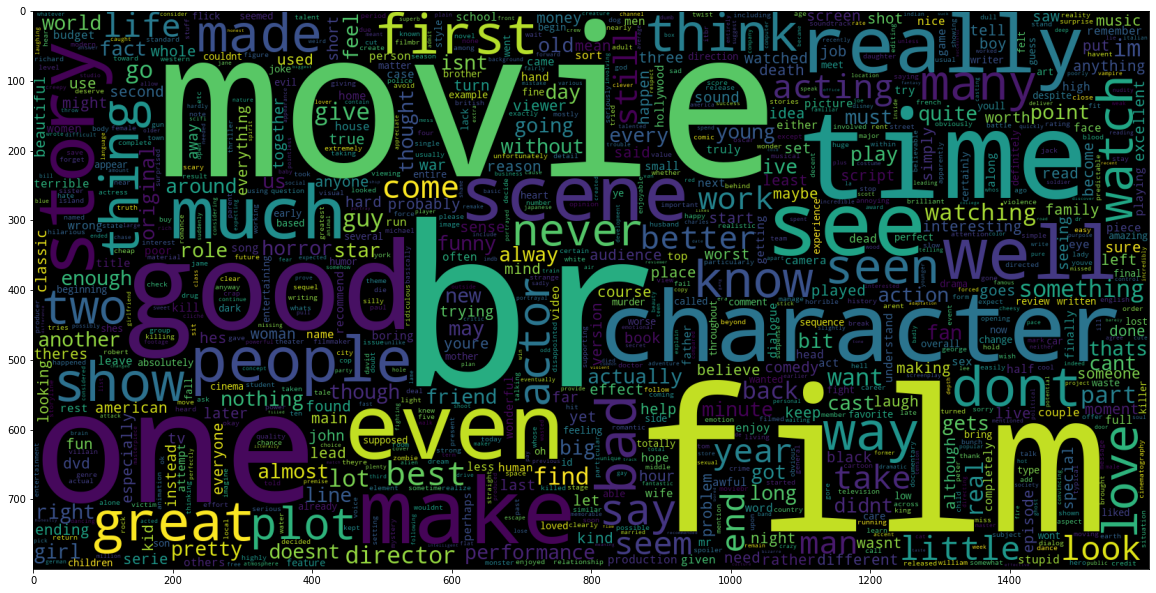

In [ ]:
data_neg = data['review'][:25000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

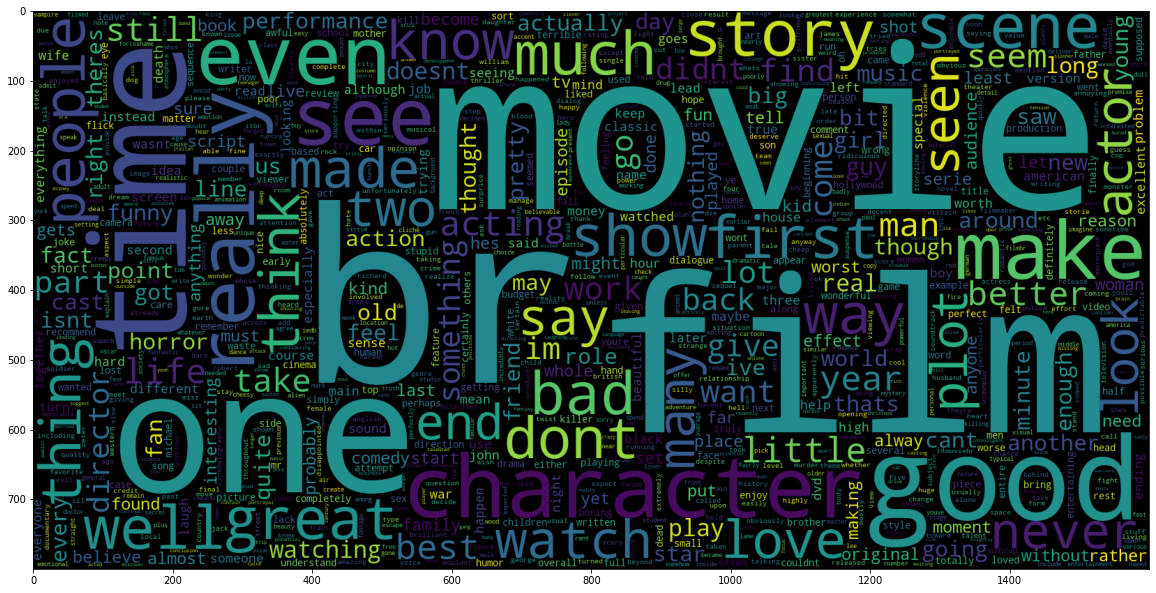

In [ ]:
data_pos = data['review'][25000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [ ]:

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      1256
    positive       0.89      0.90      0.89      1244

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



              precision    recall  f1-score   support

    negative       0.92      0.91      0.91      1256
    positive       0.91      0.92      0.91      1244

    accuracy                           0.91      2500
   macro avg       0.91      0.91      0.91      2500
weighted avg       0.91      0.91      0.91      2500



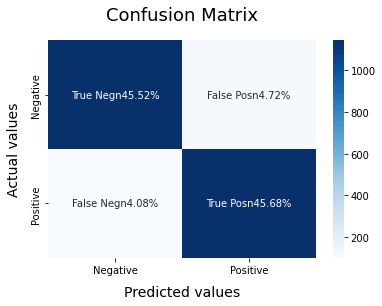

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      1256
    positive       0.89      0.91      0.90      1244

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=28)
clf = clf.fit(X_train, y_train)
model_Evaluate(clf)

              precision    recall  f1-score   support

    negative       0.81      0.86      0.84      1256
    positive       0.85      0.80      0.82      1244

    accuracy                           0.83      2500
   macro avg       0.83      0.83      0.83      2500
weighted avg       0.83      0.83      0.83      2500



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=12)
neigh.fit(X_train, y_train) 
neigh.set_params(p=7)
model_Evaluate(neigh)

              precision    recall  f1-score   support

    negative       0.84      0.77      0.80      1256
    positive       0.79      0.85      0.82      1244

    accuracy                           0.81      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.81      0.81      0.81      2500



              precision    recall  f1-score   support

    negative       0.74      0.68      0.71      1256
    positive       0.70      0.76      0.73      1244

    accuracy                           0.72      2500
   macro avg       0.72      0.72      0.72      2500
weighted avg       0.72      0.72      0.72      2500



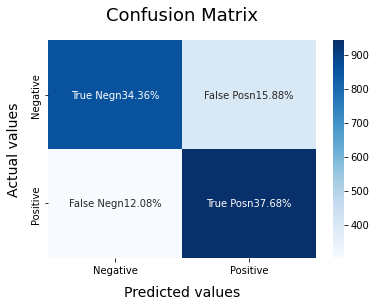

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier(max_depth = 11, min_samples_split=90)
tree_model.fit(X_train, y_train)
model_Evaluate(tree_model)